# Installing libaries

In [1]:
!pip install vaderSentiment

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     |████████████████████████████████| 125 kB 23.6 MB/s eta 0:00:01


In [2]:
!pip install --upgrade spacy

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     |████████████████████████████████| 6.4 MB 30.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 719 kB/s  eta 0:00:01
     |████████████████████████████████| 12.4 MB 67.1 MB/s eta 0:00:01
     |████████████████████████████████| 813 kB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 83.9 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 61.5 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 7.8 MB 37.6 MB/s eta 0:00:01
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: blis
    Found 

In [3]:
!python -m spacy download en_core_web_lg

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2022-09-14 21:35:25.485193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/conda/lib:
2022-09-14 21:35:25.485236: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-14 21:35:25.485274: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (84b113f715ac): /proc/driver/nvidia/version does not exist
     |████████████████████████████████| 587.7 MB 2.6 kB/s  eta 0:00:01MB 36.3 MB/s eta 0:00:16     |████████████████▏               | 297.1 MB 83.0 MB/s eta 0:00:04MB/s eta 0:00:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [1]:
!pip install nltk

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [8]:
# pip install --upgrade pip

# Imports

In [2]:
import pandas as pd
from IPython.display import HTML
import spacy
import en_core_web_lg
import re
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from arcgis import GIS
import os
import bs4

2022-09-14 21:36:34.475467: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/conda/lib:
2022-09-14 21:36:34.475518: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-14 21:36:34.475545: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (84b113f715ac): /proc/driver/nvidia/version does not exist


# Load Data Set

In [3]:
#Load the dataset as a dataframe
raw_df = pd.read_csv('home/london2.csv', index_col=0)
raw_df.head()

,user.id,extended_tweet.full_text,text,place.name,LATITUDE,LONGITUDE,coordinates.coordinates,place.bounding_box.coordinates
created_at,,,,,,,,
Thu Jul 26 13:39:37 +0000 2018,9.860000e+17,What’s cooler than being cool? \n - Ice Cold m...,What’s cooler than being cool? \n - Ice Cold m...,Poplar,51.519230,-0.076010,"[-0.07601,51.51923]","[[[-0.080028,51.48432],[-0.080028,51.545341],[..."
Thu Jul 26 13:40:01 +0000 2018,1.764930e+07,NaN,I'm at @SurreyRugCare in Cheam https://t.co/E5...,Sutton,51.369736,-0.212330,"[-0.21233046,51.36973556]","[[[-0.245869,51.330352],[-0.245869,51.393443],..."
Thu Jul 26 13:40:02 +0000 2018,2.147603e+07,NaN,Property Alert: 1 Bedroom Flat For Sale https:...,Harrow,51.579237,-0.332129,"[-0.3321287,51.5792375]","[[[-0.403988,51.55309],[-0.403988,51.638576],[..."
Thu Jul 26 13:40:08 +0000 2018,3.014872e+09,Unveiling our new Logo✨ New Logo alert 😉 This ...,Unveiling our new Logo✨ New Logo alert 😉 This ...,Eltham,51.508440,0.123540,"[0.1235397,51.5084396]","[[[0.045148,51.423888],[0.045148,51.512916],[0..."
Thu Jul 26 13:40:09 +0000 2018,1.345442e+08,House of Spangled Swimwear. Exclusive printed ...,House of Spangled Swimwear. Exclusive printed ...,London,51.507115,-0.127318,"[-0.12731805,51.50711486]","[[[-0.187894,51.483718],[-0.187894,51.516466],..."


# Pre Processing

## Data Cleaning

In [4]:
# Remove data outside of the London
raw_df = raw_df[(raw_df['LATITUDE'] > 51.3) & (raw_df['LATITUDE'] < 51.7)]
raw_df = raw_df[(raw_df['LONGITUDE'] < 0.2) & (raw_df['LONGITUDE'] > -0.5)]

In [5]:
#Convert text to lower case
raw_df['text'] = raw_df['text'].str.lower()

In [6]:
#remove unnesesary columns
raw_df = raw_df.drop(['extended_tweet.full_text'],axis=1)
raw_df

,user.id,text,place.name,LATITUDE,LONGITUDE,coordinates.coordinates,place.bounding_box.coordinates
created_at,,,,,,,
Thu Jul 26 13:39:37 +0000 2018,9.860000e+17,what’s cooler than being cool? \n - ice cold m...,Poplar,51.519230,-0.076010,"[-0.07601,51.51923]","[[[-0.080028,51.48432],[-0.080028,51.545341],[..."
Thu Jul 26 13:40:01 +0000 2018,1.764930e+07,i'm at @surreyrugcare in cheam https://t.co/e5...,Sutton,51.369736,-0.212330,"[-0.21233046,51.36973556]","[[[-0.245869,51.330352],[-0.245869,51.393443],..."
Thu Jul 26 13:40:02 +0000 2018,2.147603e+07,property alert: 1 bedroom flat for sale https:...,Harrow,51.579237,-0.332129,"[-0.3321287,51.5792375]","[[[-0.403988,51.55309],[-0.403988,51.638576],[..."
Thu Jul 26 13:40:08 +0000 2018,3.014872e+09,unveiling our new logo✨ new logo alert 😉 this ...,Eltham,51.508440,0.123540,"[0.1235397,51.5084396]","[[[0.045148,51.423888],[0.045148,51.512916],[0..."
Thu Jul 26 13:40:09 +0000 2018,1.345442e+08,house of spangled swimwear. exclusive printed ...,London,51.507115,-0.127318,"[-0.12731805,51.50711486]","[[[-0.187894,51.483718],[-0.187894,51.516466],..."
...,...,...,...,...,...,...,...
Thu Jul 26 17:02:14 +0000 2018,2.164407e+09,great client lunch today. thanks for coming! ...,Paddington,51.516796,-0.136244,"[-0.1362441,51.5167961]","[[[-0.21607,51.509879],[-0.21607,51.539792],[-..."
Thu Jul 26 17:02:19 +0000 2018,2.507992e+07,student divyadivya.2015 from #germany working ...,Harrow,51.580735,-0.343059,"[-0.343059,51.580735]","[[[-0.403988,51.55309],[-0.403988,51.638576],[..."
Thu Jul 26 17:02:37 +0000 2018,2.507992e+07,day 3 makeup and hair by student divyadivya.20...,Harrow,51.580735,-0.343059,"[-0.343059,51.580735]","[[[-0.403988,51.55309],[-0.403988,51.638576],[..."


## Data Quality Assessment

In [7]:
#Check data types
print('---------------Information about the dataset----------------\n')
print(raw_df.info())

#Change review_score data type to int
raw_df['user.id']=raw_df['user.id'].astype(int)
print(raw_df.info())

# Find Duplicate value count
print('---------------Duplicated values----------------\n')
print('Duplicated values:',raw_df.duplicated().sum())

---------------Information about the dataset----------------

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, Thu Jul 26 13:39:37 +0000 2018 to Thu Jul 26 17:03:05 +0000 2018
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user.id                         228 non-null    float64
 1   text                            228 non-null    object 
 2   place.name                      228 non-null    object 
 3   LATITUDE                        228 non-null    float64
 4   LONGITUDE                       228 non-null    float64
 5   coordinates.coordinates         228 non-null    object 
 6   place.bounding_box.coordinates  228 non-null    object 
dtypes: float64(3), object(4)
memory usage: 14.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, Thu Jul 26 13:39:37 +0000 2018 to Thu Jul 26 17:03:05 +0000 2018
Data columns (total 7 columns):
 #   Column          

## Exploratory Data Analysis

In [8]:
#print details of the dataframe
def pretty_print_df(value_counts_):
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [9]:
#Find no of rows and columns in the dataset
print('---------------Number of rows and columns in the dataset---------------\n')
print(raw_df.shape)
#Find all column names
print('------------------------------Column names-----------------------------\n')
print(raw_df.columns)
#Find the datatype of each column
print('--------------------------------Data types-----------------------------\n')
print(raw_df.dtypes)
#Print first 10 rows
print('----------------------First 10 rows in the dataset---------------------\n')
print(raw_df.head(10))
#Find the mean, max and other numarical calculation in numerical data columns
print('------------------Stastical information of the dataset--- -------------\n')
print(raw_df.describe())
print(raw_df.groupby('place.name').describe())

# Find Missing data value count 
print('---------------------------Missing value counts------------------------\n')
print('\nMissing values\n')
print(raw_df.isnull().sum())

---------------Number of rows and columns in the dataset---------------

(228, 7)
------------------------------Column names-----------------------------

Index(['user.id', 'text', 'place.name', 'LATITUDE', 'LONGITUDE',
       'coordinates.coordinates', 'place.bounding_box.coordinates'],
      dtype='object')
--------------------------------Data types-----------------------------

user.id                             int64
text                               object
place.name                         object
LATITUDE                          float64
LONGITUDE                         float64
coordinates.coordinates            object
place.bounding_box.coordinates     object
dtype: object
----------------------First 10 rows in the dataset---------------------

                                           user.id  \
created_at                                           
Thu Jul 26 13:39:37 +0000 2018  986000000000000000   
Thu Jul 26 13:40:01 +0000 2018            17649300   
Thu Jul 26 13:40:02

In [10]:
df = raw_df.copy()

# Text Cleaning

In [11]:
def decontracted(sentence):
  sentence = re.sub(r"won't", "will not", sentence)
  sentence = re.sub(r"can\'t", "can not", sentence)
  sentence = re.sub(r"n\'t", " not", sentence)
  sentence = re.sub(r"\'re", " are", sentence)
  sentence = re.sub(r"\'s", " is", sentence)
  sentence = re.sub(r"\'d", " would", sentence)
  sentence = re.sub(r"\'ll", " will", sentence)
  sentence = re.sub(r"\'t", " not", sentence)
  sentence = re.sub(r"\'ve", " have", sentence)
  sentence = re.sub(r"\'m", " am", sentence)
  return sentence

In [12]:
# Create an NLP pipeline
nlp = spacy.load('en_core_web_lg')

def textcleaning(column):
  tk = decontracted(column)
  # Remove stopword, punctuations, tokenization and lemmatization
  col2 = [w.lemma_ for w in nlp(tk)if not (w.is_stop) or (w.is_punct)]
  return (" ".join(col2))

In [13]:
df['text'] = df['text'].apply(lambda x: textcleaning(x))

In [14]:
#Remove html tags
df['text']=df['text'].replace(r'<[^<>]*>', '', regex=True)
#Remove special characters
df['text']=df['text'].replace(r'[^A-Za-z0-9 ]+', '', regex=True)
#Remove web tags
df['text']=df['text'].replace(r'{html}', '', regex=True)
#Remove web urls
df['text']=df['text'].replace(r'http\S+', '', regex=True)
#Remove numbers
df['text']=df['text'].replace(r'[0-9]+', '', regex=True)
#remove emails
df['text']=df['text'].replace(r'\S*@\S*\s?', '', regex=True)
#remove unnessary white spaces
df['text']=df['text'].replace(r'\s\s+', '', regex=True)
#Remove empty text rows
df = df.loc[df['text'] != '']

## EDA for Text data

In [15]:
df.index = pd.to_datetime(df.index)

In [16]:
# Separate dataset according to the peak and off-peak hours
df1 = df.between_time('16:00', '18:59')
df2 = df.between_time('6:30', '9:29')
peak1 = [df1,df2]
peak = pd.concat(peak1)
df3 = df.between_time('9:30', '15:59')
df4 = df.between_time('19:00', '6:30')
off_peak1 = [df3,df4]
off_peak = pd.concat(off_peak1)

In [17]:
df

,user.id,text,place.name,LATITUDE,LONGITUDE,coordinates.coordinates,place.bounding_box.coordinates
created_at,,,,,,,
2018-07-26 13:39:37+00:00,986000000000000000,cool coolice cold matcha lattesimple n delishm...,Poplar,51.519230,-0.076010,"[-0.07601,51.51923]","[[[-0.080028,51.48432],[-0.080028,51.545341],[..."
2018-07-26 13:40:01+00:00,17649300,surreyrugcare cheam,Sutton,51.369736,-0.212330,"[-0.21233046,51.36973556]","[[[-0.245869,51.330352],[-0.245869,51.393443],..."
2018-07-26 13:40:02+00:00,21476032,property alertbedroom flat salegaytonroadharrowha,Harrow,51.579237,-0.332129,"[-0.3321287,51.5792375]","[[[-0.403988,51.55309],[-0.403988,51.638576],[..."
2018-07-26 13:40:08+00:00,3014871646,unveil new logonew logo alertnew logo look lik...,Eltham,51.508440,0.123540,"[0.1235397,51.5084396]","[[[0.045148,51.423888],[0.045148,51.512916],[0..."
2018-07-26 13:40:09+00:00,134544230,house spangle swimwearexclusive print apparell...,London,51.507115,-0.127318,"[-0.12731805,51.50711486]","[[[-0.187894,51.483718],[-0.187894,51.516466],..."
...,...,...,...,...,...,...,...
2018-07-26 17:02:14+00:00,2164406816,great client lunch todaythank comepropertyprop...,Paddington,51.516796,-0.136244,"[-0.1362441,51.5167961]","[[[-0.21607,51.509879],[-0.21607,51.539792],[-..."
2018-07-26 17:02:19+00:00,25079915,student divyadivyagermany work hard daymakeupm...,Harrow,51.580735,-0.343059,"[-0.343059,51.580735]","[[[-0.403988,51.55309],[-0.403988,51.638576],[..."
2018-07-26 17:02:37+00:00,25079915,daymakeup hair student divyadivya model payals...,Harrow,51.580735,-0.343059,"[-0.343059,51.580735]","[[[-0.403988,51.55309],[-0.403988,51.638576],[..."


In [18]:
#tokenization
nltk.download('punkt')

token_lengths= []
all_tokens =[]
peak_tokens = []
off_peak_tokens= []
for item in df.values:
  token_lengths.append(len(item[1]))
  tokens = nltk.word_tokenize(item[1])
  all_tokens.append(tokens)

for item in peak.values:
  tokens = nltk.word_tokenize(item[1])
  peak_tokens.append(tokens)

for item in off_peak.values:
  tokens = nltk.word_tokenize(item[1])
  off_peak_tokens.append(tokens)

[nltk_data] Downloading package punkt to /home/arcgis/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
print('------------------------Token length exploration------------------------\n')
print('Minimum number of tokens: ', np.min((token_lengths)))
print('Maximum number of tokens: ', np.max(token_lengths))

------------------------Token length exploration------------------------

Minimum number of tokens:  16
Maximum number of tokens:  103


# NLP Methodology

## Frequency Analysis

In [20]:
def tokenize_as_is(x):
  return x

# define a function to get the most frequent ngrams
def get_top_ngram(spacy_tokenized_corpus, ngram_range=(2,2), top_n= 50):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=top_n, lowercase=False,
                          tokenizer=tokenize_as_is).fit(spacy_tokenized_corpus)
    # get a vector for each document
    bag_of_words = vec.transform(spacy_tokenized_corpus)
    vec2 = CountVectorizer(ngram_range=ngram_range, lowercase=False,
                          tokenizer=tokenize_as_is).fit(spacy_tokenized_corpus)
    print(f"\n The number of features in the vocabulary is {len(vec2.get_feature_names_out())}")
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return bag_of_words, words_freq


 The number of features in the vocabulary is 1092


/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:title={'center':'Bigram with frequencies for all data'}, xlabel='Frequency'>

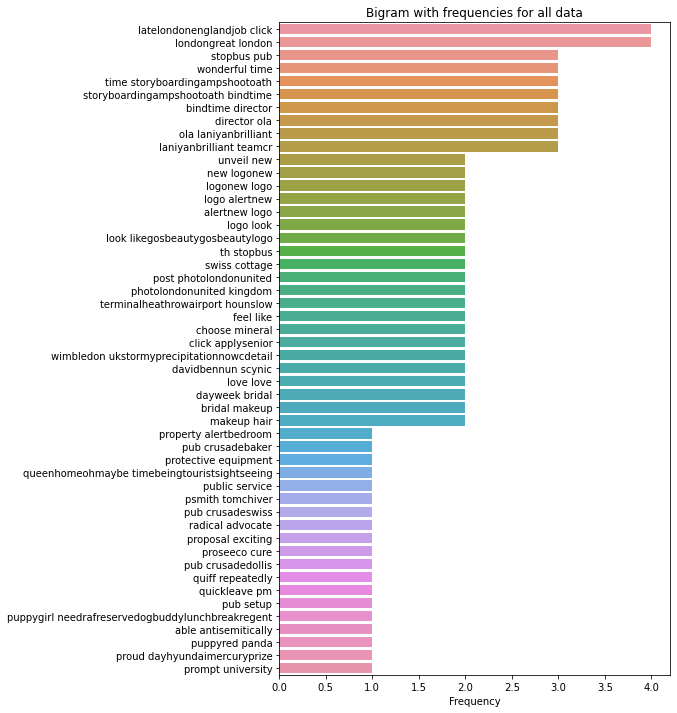

In [21]:
#Most frequent bigram for all tokens in the dataset
bag_of_words, words_freq= get_top_ngram(all_tokens, ngram_range=(2,2), top_n= 50) 
# separate the n_grams from their frequencies
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("Bigram with frequencies for all data")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)


 The number of features in the vocabulary is 430


/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:title={'center':'Bigram with frequencies for peak times'}, xlabel='Frequency'>

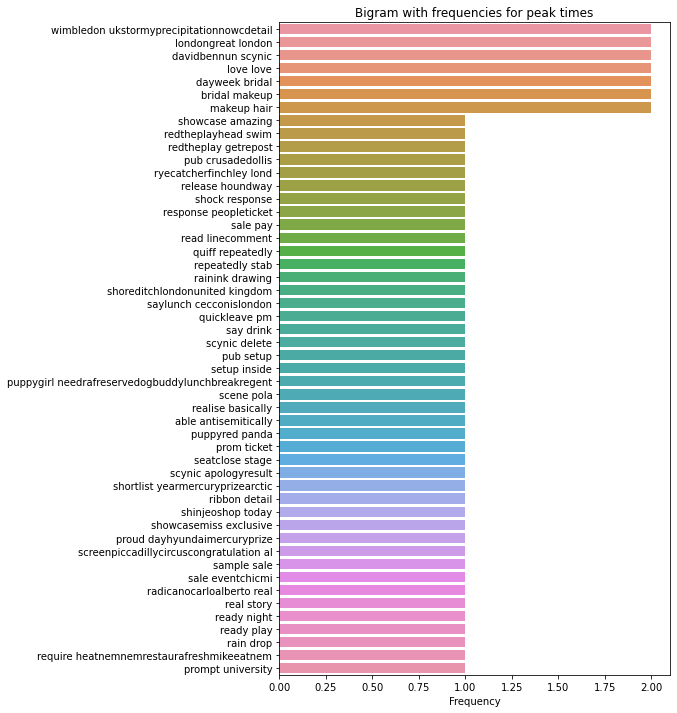

In [22]:
#Most frequent bigram for peak times
bag_of_words, words_freq= get_top_ngram(peak_tokens, ngram_range=(2,2), top_n= 50) 
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("Bigram with frequencies for peak times")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)


 The number of features in the vocabulary is 650


/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:title={'center':'Bigram with frequencies for off peak times'}, xlabel='Frequency'>

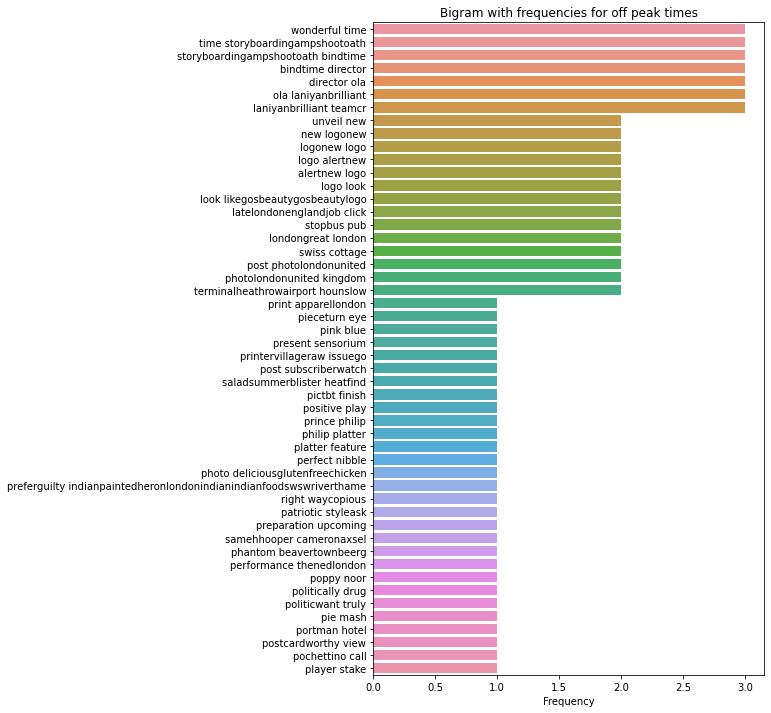

In [23]:
#Most frequent bigram for off peak times
bag_of_words, words_freq= get_top_ngram(off_peak_tokens, ngram_range=(2,2), top_n= 50) 
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("Bigram with frequencies for off peak times")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)

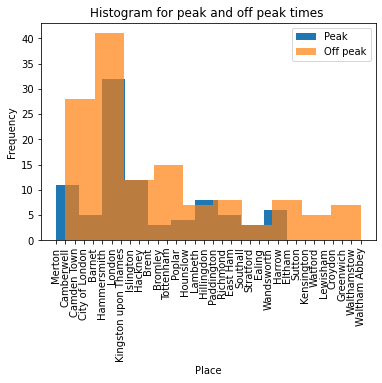

In [24]:
#Histogram  
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Histogram for peak and off peak times ")

ax.hist(peak['place.name'])
ax.hist(off_peak['place.name'], alpha=0.7)
plt.xticks(rotation = 90) 
ax.set_xlabel('Place')
_ =ax.set_ylabel('Frequency')
_= ax.legend(['Peak','Off peak'])
plt.show()

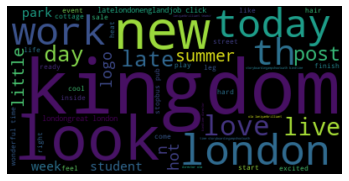

In [25]:
#Visualizing the most frequent words for the whole dataset
stops = nlp.Defaults.stop_words
wordcloud = WordCloud(stopwords=stops).generate(' '.join(df['text'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

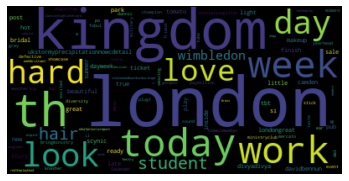

In [26]:
#Visualizing the most frequent words in peak time
stops = nlp.Defaults.stop_words
wordcloud = WordCloud(stopwords=stops).generate(' '.join(peak['text'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

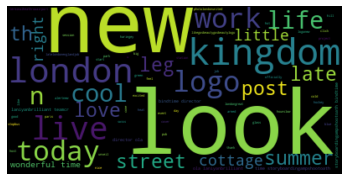

In [27]:
#Visualizing the most frequent words in off peak time
stops = nlp.Defaults.stop_words
wordcloud = WordCloud(stopwords=stops).generate(' '.join(off_peak['text'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Remove non-travel related tweets
searchfor = ['job', 'work', 'makeup','flat']
df = df[~df.text.str.contains('|'.join(searchfor))]
df

,user.id,text,place.name,LATITUDE,LONGITUDE,coordinates.coordinates,place.bounding_box.coordinates
created_at,,,,,,,
2018-07-26 13:39:37+00:00,986000000000000000,cool coolice cold matcha lattesimple n delishm...,Poplar,51.519230,-0.076010,"[-0.07601,51.51923]","[[[-0.080028,51.48432],[-0.080028,51.545341],[..."
2018-07-26 13:40:01+00:00,17649300,surreyrugcare cheam,Sutton,51.369736,-0.212330,"[-0.21233046,51.36973556]","[[[-0.245869,51.330352],[-0.245869,51.393443],..."
2018-07-26 13:40:08+00:00,3014871646,unveil new logonew logo alertnew logo look lik...,Eltham,51.508440,0.123540,"[0.1235397,51.5084396]","[[[0.045148,51.423888],[0.045148,51.512916],[0..."
2018-07-26 13:40:09+00:00,134544230,house spangle swimwearexclusive print apparell...,London,51.507115,-0.127318,"[-0.12731805,51.50711486]","[[[-0.187894,51.483718],[-0.187894,51.516466],..."
2018-07-26 13:40:43+00:00,119768841,byelondon soonsolongfarewelladieu parting swee...,Camden Town,51.528400,-0.133100,"[-0.1331,51.5284]","[[[-0.213503,51.512805],[-0.213503,51.572068],..."
...,...,...,...,...,...,...,...
2018-07-26 17:01:53+00:00,1365521923,time week get ready night finish chemotherapye...,Islington,51.546337,-0.115505,"[-0.11550531,51.54633655]","[[[-0.142058,51.518552],[-0.142058,51.575301],..."
2018-07-26 17:02:13+00:00,586017139,great week ready play week tomorrowtheatrepupp...,Camberwell,51.503951,-0.080904,"[-0.08090444,51.50395133]","[[[-0.111476,51.419425],[-0.111476,51.509947],..."
2018-07-26 17:02:14+00:00,2164406816,great client lunch todaythank comepropertyprop...,Paddington,51.516796,-0.136244,"[-0.1362441,51.5167961]","[[[-0.21607,51.509879],[-0.21607,51.539792],[-..."



 The number of features in the vocabulary is 1332


/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:title={'center':'frequencies for off peak times'}, xlabel='Frequency'>

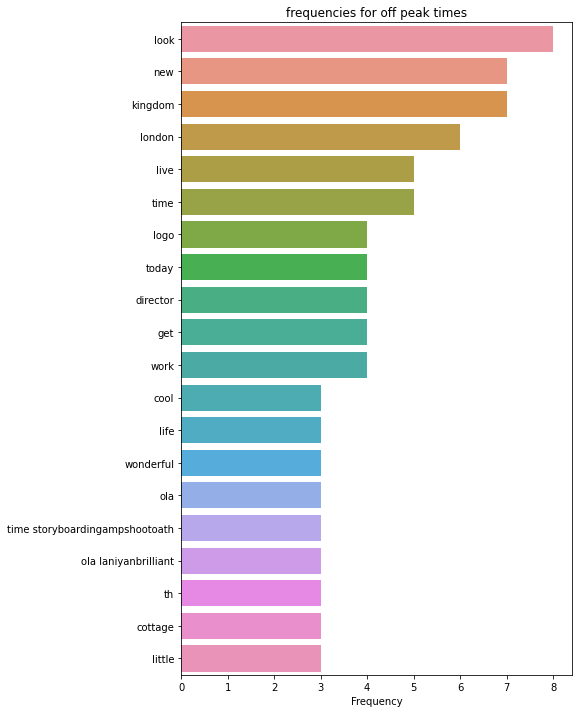

In [29]:
#Most frequent bigram for off peak times
bag_of_words, words_freq= get_top_ngram(off_peak_tokens, ngram_range=(1,2), top_n= 20) 
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("frequencies for off peak times")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)


 The number of features in the vocabulary is 886


/opt/conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<AxesSubplot:title={'center':'frequencies for peak times'}, xlabel='Frequency'>

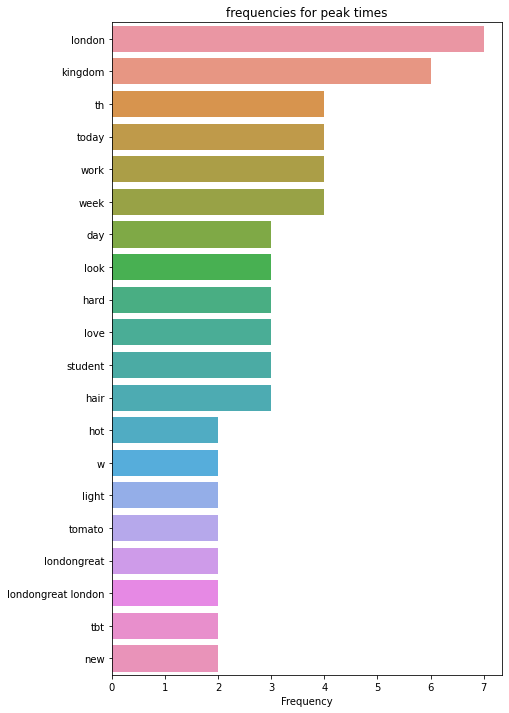

In [30]:
#Most frequent bigram for off peak times
bag_of_words, words_freq= get_top_ngram(peak_tokens, ngram_range=(1,2), top_n= 20) 
ngram_labels = [word[0] for word in words_freq]
ngram_freqs = [word[1] for word in words_freq]
plt.figure(figsize=(7,12))
plt.title("frequencies for peak times")
plt.xlabel("Frequency")
sns.barplot(x=ngram_freqs,y=ngram_labels)

## Sentiment Analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [31]:
def sentiment_scores(sentence):

  sid_obj = SentimentIntensityAnalyzer()
  senti = 0
 
  # sentiment_dict = sid_obj.polarity_scores(sentence)
  
  compound = sid_obj.polarity_scores(sentence)["compound"]
  pos = sid_obj.polarity_scores(sentence)["pos"]
  neu = sid_obj.polarity_scores(sentence)["neu"]
  neg = sid_obj.polarity_scores(sentence)["neg"]

  if compound >= 0.05 :
    senti = 'Positive'
    
  elif compound <= - 0.05 :
    senti = 'Negative'
    
  else :
    senti = 'Neutral'

  return pos,neu,neg,compound,senti


In [32]:
sentiments = []
senti = []
X = np.array(df[['text']])
for sentence in X:
  pos,neu,neg,comp,s = sentiment_scores(sentence)
  senti.append(s)
  # comp.append(x['compound'])
  sentiments.append({"text":sentence,"Compound": comp,"Positive": pos,"Negative": neg, "Neutral": neu})
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df['val']=(senti)
# senti_score['score']=(y)

In [33]:
df['Compound'] = sentiments_df['Compound'].values
df['Positive'] = sentiments_df['Positive'].values
df['Negative'] = sentiments_df['Negative'].values
df['Neutral'] = sentiments_df['Neutral'].values
df['Sentiment'] = sentiments_df['val'].values
df

/tmp/ipykernel_54/1119242338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Compound'] = sentiments_df['Compound'].values
/tmp/ipykernel_54/1119242338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive'] = sentiments_df['Positive'].values
/tmp/ipykernel_54/1119242338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,user.id,text,place.name,LATITUDE,LONGITUDE,coordinates.coordinates,place.bounding_box.coordinates,Compound,Positive,Negative,Neutral,Sentiment
created_at,,,,,,,,,,,,
2018-07-26 13:39:37+00:00,986000000000000000,cool coolice cold matcha lattesimple n delishm...,Poplar,51.519230,-0.076010,"[-0.07601,51.51923]","[[[-0.080028,51.48432],[-0.080028,51.545341],[...",0.3182,0.277,0.000,0.723,Positive
2018-07-26 13:40:01+00:00,17649300,surreyrugcare cheam,Sutton,51.369736,-0.212330,"[-0.21233046,51.36973556]","[[[-0.245869,51.330352],[-0.245869,51.393443],...",0.0000,0.000,0.000,1.000,Neutral
2018-07-26 13:40:08+00:00,3014871646,unveil new logonew logo alertnew logo look lik...,Eltham,51.508440,0.123540,"[0.1235397,51.5084396]","[[[0.045148,51.423888],[0.045148,51.512916],[0...",0.0000,0.000,0.000,1.000,Neutral
2018-07-26 13:40:09+00:00,134544230,house spangle swimwearexclusive print apparell...,London,51.507115,-0.127318,"[-0.12731805,51.50711486]","[[[-0.187894,51.483718],[-0.187894,51.516466],...",0.0000,0.000,0.000,1.000,Neutral
2018-07-26 13:40:43+00:00,119768841,byelondon soonsolongfarewelladieu parting swee...,Camden Town,51.528400,-0.133100,"[-0.1331,51.5284]","[[[-0.213503,51.512805],[-0.213503,51.572068],...",0.4588,0.375,0.000,0.625,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-26 17:01:53+00:00,1365521923,time week get ready night finish chemotherapye...,Islington,51.546337,-0.115505,"[-0.11550531,51.54633655]","[[[-0.142058,51.518552],[-0.142058,51.575301],...",0.3612,0.263,0.000,0.737,Positive
2018-07-26 17:02:13+00:00,586017139,great week ready play week tomorrowtheatrepupp...,Camberwell,51.503951,-0.080904,"[-0.08090444,51.50395133]","[[[-0.111476,51.419425],[-0.111476,51.509947],...",0.8402,0.692,0.000,0.308,Positive
2018-07-26 17:02:14+00:00,2164406816,great client lunch todaythank comepropertyprop...,Paddington,51.516796,-0.136244,"[-0.1362441,51.5167961]","[[[-0.21607,51.509879],[-0.21607,51.539792],[-...",0.6249,0.506,0.000,0.494,Positive


In [34]:
categorical_columns= ['Sentiment', 'place.name']
df1  = df#df[df['place.name'] == 'London']
for col in categorical_columns:
  print(f"'{col}' categories and it's number of occurrences'")
  pretty_print_df(df1[col].value_counts())
  print()

'Sentiment' categories and it's number of occurrences'


,Sentiment
Neutral,115
Positive,68
Negative,17



'place.name' categories and it's number of occurrences'


,place.name
London,56
Camden Town,16
Islington,15
Camberwell,11
Paddington,10
Hackney,8
Poplar,7
Tottenham,7
City of London,7
Barnet,5


In [35]:
print(sentiments_df[sentiments_df['val'] == 'Negative']['text'].head(3))
print(sentiments_df[sentiments_df['val'] == 'Positive']['text'].head(3))
print(sentiments_df[sentiments_df['val'] == 'Neutral']['text'].head(3))

26    [officially leg fire yesterday killer leg sess...
27    [well cask sucker ryedrink wryneck rye thamess...
50     [waste time look loselife mean travel backwards]
Name: text, dtype: object
0    [cool coolice cold matcha lattesimple n delish...
4    [byelondon soonsolongfarewelladieu parting swe...
5           [uniform arrrivego look smart campdayplus]
Name: text, dtype: object
1                               [surreyrugcare cheam ]
2    [unveil new logonew logo alertnew logo look li...
3    [house spangle swimwearexclusive print apparel...
Name: text, dtype: object


In [36]:
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
X = sentiments_df[['Positive','Negative']]
#predict the labels of clusters.
label = kmeans.fit_predict(X)
y_kmeans = kmeans.predict(X)

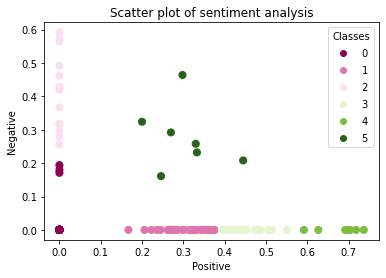

In [37]:
N = 198
c = np.random.randint(-1, 1,N)
scatter=plt.scatter(sentiments_df['Positive'],  sentiments_df['Negative'] , c=y_kmeans, s=50, cmap='PiYG')
scatter.legend_elements()
plt.title('Scatter plot of sentiment analysis')
#plt.tricontourf(sentiments_df['Positive'],  sentiments_df['Negative'], sentiments_df['Neutral'])
plt.ylabel('Negative')
plt.xlabel('Positive')
plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.show()

# Visualisation

In [38]:
df1 = df.between_time('16:00', '18:59')
df2 = df.between_time('6:30', '9:29')
peak1 = [df1,df2]
peak = pd.concat(peak1)
df3 = df.between_time('9:30', '15:59')
df4 = df.between_time('19:00', '6:30')
off_peak1 = [df3,df4]
off_peak = pd.concat(off_peak1)

In [39]:
#create spatial enable dataframe for whole data, peak and off-peak times.
off_peak_sdf = pd.DataFrame.spatial.from_xy(off_peak, 'LONGITUDE','LATITUDE')
peak_sdf  = pd.DataFrame.spatial.from_xy(peak, 'LONGITUDE','LATITUDE')
sdf  = pd.DataFrame.spatial.from_xy(df, 'LONGITUDE','LATITUDE')
peak_sdf

/opt/conda/lib/python3.9/site-packages/arcgis/features/geo/_io/fileops.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SHAPE"] = GeoArray(ags_geom)


,user.id,text,place.name,LATITUDE,LONGITUDE,coordinates.coordinates,place.bounding_box.coordinates,Compound,Positive,Negative,Neutral,Sentiment,SHAPE
created_at,,,,,,,,,,,,,
2018-07-26 16:00:04+00:00,469453776,wimbledon ukstormyprecipitationnowcdetail,Merton,51.396667,-0.237222,"[-0.23722222,51.39666667]","[[[-0.254269,51.379947],[-0.254269,51.441804],...",0.0000,0.000,0.000,1.000,Neutral,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.2..."
2018-07-26 16:00:41+00:00,132550870,excited dannic ministryclub th augusttag frien...,Camberwell,51.497484,-0.099405,"[-0.0994055,51.4974845]","[[[-0.111476,51.419425],[-0.111476,51.509947],...",0.6808,0.444,0.000,0.556,Positive,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.0..."
2018-07-26 16:00:52+00:00,1904497855,today champion mean diversity initiativepillar...,Camden Town,51.520000,-0.119298,"[-0.11929803,51.52000004]","[[[-0.213503,51.512805],[-0.213503,51.572068],...",0.6249,0.445,0.208,0.347,Positive,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.1..."
2018-07-26 16:00:54+00:00,768000000000000000,stick tube hot day yearhead homecomember taste...,City of London,51.510462,-0.085545,"[-0.0855448,51.5104621]","[[[-0.112442,51.5068],[-0.112442,51.522161],[-...",0.0000,0.000,0.000,1.000,Neutral,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.0..."
2018-07-26 16:01:08+00:00,702000000000000000,m paymillion defective military ear plugt,Barnet,51.606641,-0.198339,"[-0.19833863,51.60664115]","[[[-0.292579,51.555179],[-0.292579,51.66859],[...",-0.4404,0.000,0.367,0.633,Negative,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-26 17:01:53+00:00,1365521923,time week get ready night finish chemotherapye...,Islington,51.546337,-0.115505,"[-0.11550531,51.54633655]","[[[-0.142058,51.518552],[-0.142058,51.575301],...",0.3612,0.263,0.000,0.737,Positive,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.1..."
2018-07-26 17:02:13+00:00,586017139,great week ready play week tomorrowtheatrepupp...,Camberwell,51.503951,-0.080904,"[-0.08090444,51.50395133]","[[[-0.111476,51.419425],[-0.111476,51.509947],...",0.8402,0.692,0.000,0.308,Positive,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.0..."
2018-07-26 17:02:14+00:00,2164406816,great client lunch todaythank comepropertyprop...,Paddington,51.516796,-0.136244,"[-0.1362441,51.5167961]","[[[-0.21607,51.509879],[-0.21607,51.539792],[-...",0.6249,0.506,0.000,0.494,Positive,"{""spatialReference"": {""wkid"": 4326}, ""x"": -0.1..."


In [40]:
gis = GIS('home')

In [41]:
#Load London Map
map_item = gis.content.get("774de3b4b9f047dda0851a37efedf789")

In [42]:
#Load London Map
londonMap_h = gis.map(map_item)
# Create a heat map for whole dataset
sdf.drop(['Sentiment'], axis = 1).spatial.plot(map_widget=londonMap_h,
                renderer_type='h',
                symbol_type='simple',
                colorRamp = {"type":"algorithmic", "fromColor":[133,193,200,0], "toColor":[255,255,0,0], "algorithm": "esriHSVAlgorithm" },
                cstep=50,
                ratio = 0.01,
                marker_size=10)

londonMap_h.legend = True
londonMap_h

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [43]:
#Load London Map
londonMap_peak_h = gis.map(map_item)
# Create a heat map peak times
peak_sdf.drop(['Sentiment'], axis = 1).spatial.plot(map_widget=londonMap_peak_h,
                renderer_type='h',
                symbol_type='simple',
                colorRamp = {"type":"algorithmic", "fromColor":[133,193,200,0], "toColor":[255,255,0,0], "algorithm": "esriHSVAlgorithm" },
                cstep=50,
                ratio = 0.01,
                marker_size=10)
londonMap_peak_h.legend = True
londonMap_peak_h

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [44]:
#Load London Map
londonMap_off_peak_h = gis.map(map_item)
# Create a heat map off-peak times
off_peak_sdf.drop(['Sentiment'], axis = 1).spatial.plot(map_widget=londonMap_off_peak_h,
                renderer_type='h',
                symbol_type='simple',
                colorRamp = {"type":"algorithmic", "fromColor":[133,193,200,0], "toColor":[255,255,0,0], "algorithm": "esriHSVAlgorithm" },
                cstep=50,
                ratio = 0.01,
                marker_size=10,
                height = 40,
                         width = 60)

londonMap_off_peak_h.legend = True
londonMap_off_peak_h

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [45]:
# Save the peak map as html file
file_dir = os.path.join(os.getcwd(),'home')
# file_dir = os.path.join(os.path.expanduser("~"), "Desktop")

if not os.path.isdir(file_dir):
    os.mkdir(file_dir)
    
file_path_peak = os.path.join(file_dir, 'peak_h.html')

londonMap_peak_h.export_to_html(file_path_peak)
print("html saved as " + file_path_peak) 

# Save the off-peak map as html file    
file_path_opeak = os.path.join(file_dir, 'off_peak_h.html')

londonMap_off_peak_h.export_to_html(file_path_opeak)
print("html saved as " + file_path_opeak)


# Save the map as html file    
file_path_data = os.path.join(file_dir, 'data_h.html')

londonMap_h.export_to_html(file_path_data)
print("html saved as " + file_path_data) 

html saved as /arcgis/home/peak_h.html
html saved as /arcgis/home/off_peak_h.html
html saved as /arcgis/home/data_h.html


In [46]:
londonMap = gis.map(map_item)
sdf.spatial.plot(map_widget=londonMap,
                renderer_type='u',
                col = 'Sentiment',
                symbol_type='simple',
                symbol_style='d', # d - for diamonds
                colors=['Reds_r','Oranges','Greens_r'],
                cstep=50,
                outline_color='Blues',
                marker_size=10)
londonMap.legend = True
londonMap

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [51]:
londonMap_off_peak = gis.map(map_item)
peak_sdf.spatial.plot(map_widget=londonMap_off_peak,
                renderer_type='u',
                col = 'Sentiment',
                symbol_type='simple',
                symbol_style='d', # d - for diamonds
                colors=['Reds_r','Oranges','Greens_r'],
                cstep=50,
                outline_color='Blues',
                marker_size=10)
londonMap_off_peak.legend = True
londonMap_off_peak

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [52]:
londonMap_off_peak = gis.map(map_item)
off_peak_sdf.spatial.plot(map_widget=londonMap_off_peak,
                renderer_type='u',
                col = 'Sentiment',
                symbol_type='simple',
                symbol_style='d', # d - for diamonds
                colors=['Reds_r','Oranges','Greens_r'],
                cstep=50,
                outline_color='Blues',
                marker_size=10)
londonMap_off_peak.legend = True
londonMap_off_peak

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [53]:
file_path_peak = os.path.join(file_dir, 'peak.html')

londonMap_peak_h.export_to_html(file_path_peak)
print("html saved as " + file_path_peak) 

# Save the off-peak map as html file    
file_path_opeak = os.path.join(file_dir, 'off_peak.html')

londonMap_off_peak_h.export_to_html(file_path_opeak)
print("html saved as " + file_path_opeak)


# Save the map as html file    
file_path_data = os.path.join(file_dir, 'data.html')

londonMap_h.export_to_html(file_path_data)
print("html saved as " + file_path_data) 

html saved as /arcgis/home/peak.html
html saved as /arcgis/home/off_peak.html
html saved as /arcgis/home/data.html
